# Feature Engineering
data : adult.csv     
target : income(>50k or <= 50k)      
preprocess :    
    - missing value : simple imputer with constant     
    - one hot encoding : relationship, race, sex      
    - binary encoding : workclass, marital status, occupation, native country       
    - ordinal encoding : education (already encoded)      
    - no teratment : numerical     
    - out : fnlwgt         
random state 10, data splitting 70:30, model tree(max depth 5, criteria entropy)


> ## Library

In [1]:
!pip install category_encoders

In [2]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing or Feature Engineering Library
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Splitting Data Library
from sklearn.model_selection import train_test_split

# ML Model
from sklearn.tree import DecisionTreeClassifier

# Accuracy Score
from sklearn.metrics import accuracy_score

> ## Data

In [3]:
adult = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\Scaling\adult.csv')
adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


> ## EDA : Missing Value

In [4]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
adult.replace('?', np.nan, inplace=True)
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

> ## EDA : Categorical Variable

In [6]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
cat_var = adult.columns[adult.dtypes == object]
cat_var

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [9]:
adult[cat_var].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


> ## Preprocessing Scenario

preprocess :    
- missing value : simple imputer with constant     
- one hot encoding : relationship, race, sex      
- binary encoding : workclass, marital status, occupation, native country       
- ordinal encoding : education (already encoded)      
- no teratment : numerical     
- out : fnlwgt    

In [10]:
# One hot encoding 
one_hot_encoding = OneHotEncoder()
one_hot_var = ['relationship', 'race', 'sex']

# Binary encoding --> binary_encoding = ce.BinaryEncoder()

# Simple imputer (mode) with binary encoding using pipeline
binary_encoding = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('binary encoder', ce.BinaryEncoder())
])
binary_var = ['workclass', 'marital.status', 'occupation', 'native.country'] # there is missing value

# Transformer
transformer = ColumnTransformer([
    ('one hot', one_hot_encoding, one_hot_var),
    ('binary', binary_encoding, binary_var)
], remainder = 'passthrough')

> ## Data Splitting

In [11]:
x = adult.drop(columns=['income', 'fnlwgt', 'education']) # drop unused columns
y = adult['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

> ## Apply Preprocessing Scenario

In [12]:
x_train_prep = transformer.fit_transform(x_train)
x_test_prep = transformer.transform(x_test)

C:\Users\user\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
x_train_prep = pd.DataFrame(x_train_prep)
x_test_prep = pd.DataFrame(x_test_prep)

In [14]:
dummy_var = list(transformer.transformers_[0][1].get_feature_names())

In [15]:
binary_var = list(transformer.transformers_[1][1]['binary encoder'].get_feature_names())

In [16]:
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [17]:
features = dummy_var + binary_var + ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [18]:
x_train_prep.shape # check column number

(22792, 38)

In [19]:
len(features) # check column number

38

In [20]:
x_train_prep.columns = features
x_test_prep.columns = features

In [21]:
x_train_prep

,x0_Husband,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Amer-Indian-Eskimo,x1_Asian-Pac-Islander,x1_Black,x1_Other,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Modeling

In [40]:
model =  DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
model.fit(x_train_prep, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [41]:
y_pred = model.predict(x_test_prep)
accuracy_score(y_test, y_pred)

0.8236257549390931

> ## Model Properties

In [42]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62914131, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22006081,
       0.15079788, 0.        , 0.        ])

In [43]:
df_importance = pd.DataFrame({
    'importance':model.feature_importances_
}, index = features).sort_values('importance', ascending = False)

<AxesSubplot:>

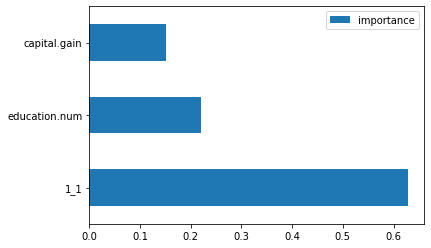

In [45]:
df_importance[:3].plot(kind = 'barh') # because other value = 0

> ## Decision Tree

In [37]:
from sklearn.tree import plot_tree

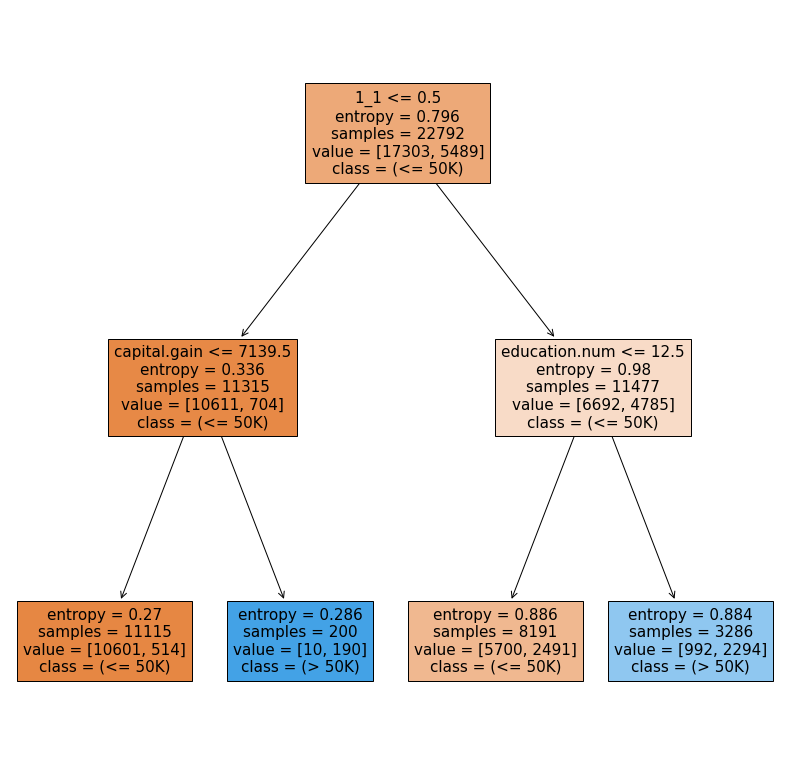

In [48]:
plt.figure(figsize=(14,14))
plot_tree(model, feature_names= features, filled = True, class_names = ['(<= 50K)', '(> 50K)'])
plt.show()

> ## Feature Selection

data : adult.csv     
target : income(>50k or <= 50k)      
preprocess :    
- missing value : simple imputer with constant     
- one hot encoding : relationship, race, sex      
- binary encoding : workclass, marital status, occupation, native country       
- ordinal encoding : education (already encoded)      
- no teratment : numerical     
- out : fnlwgt         

random state 10, data splitting 70:30,      
feature selection    
select percentile model: Logistic Regression(max iter = 1000, selver liblinear, C = 10)

> ## Library and Data


In [49]:
from sklearn.feature_selection import SelectPercentile

In [50]:
x_train_prep

,x0_Husband,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Amer-Indian-Eskimo,x1_Asian-Pac-Islander,x1_Black,x1_Other,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,68.0,10.0,0.0,0.0,20.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,10.0,0.0,0.0,40.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,56.0,7.0,0.0,0.0,40.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,44.0,9.0,0.0,0.0,40.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,48.0,13.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
22788,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,23.0,12.0,0.0,0.0,16.0
22789,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
22790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


> ## Feature Selection

In [51]:
select = SelectPercentile(percentile = 50)
select.fit(x_train_prep, y_train)
x_train_selected = select.transform(x_train_prep)
x_test_selected = select.transform(x_test_prep)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [17 21 26] are constant.
  UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [52]:
x_train_selected.shape

(22792, 19)

> ## Selected Feature

In [58]:
df_selected = pd.DataFrame({
    'var': features,
    'indicator':select.get_support() 
})

df_selected[df_selected['indicator'] == True]

,var,indicator
0,x0_Husband,True
1,x0_Not-in-family,True
3,x0_Own-child,True
4,x0_Unmarried,True
5,x0_Wife,True
8,x1_Black,True
10,x1_White,True
11,x2_Female,True
12,x2_Male,True
16,0_3,True


> ## Modeling

In [59]:
from sklearn.linear_model import LogisticRegression

In [61]:
logreg = LogisticRegression(C = 10, max_iter = 1000, solver = 'liblinear')
logreg.fit(x_train_selected, y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [62]:
y_pred = logreg.predict(x_test_selected)
accuracy_score(y_test, y_pred)

0.8427679394001433

In [64]:
logreg.coef_[0]

array([-4.27694620e-01, -3.47419440e-01, -1.40703349e+00, -8.52977474e-01,
        7.49751557e-01, -7.20136287e-01, -2.23622307e-01, -2.05452334e+00,
       -1.27142495e+00, -9.79154330e-02, -5.15732446e-01, -1.19122905e+00,
       -1.75759514e+00, -3.97492177e-01,  1.94273145e-02,  3.21713299e-01,
        3.17503360e-04,  6.06749926e-04,  2.71133220e-02])

In [66]:
df_selected[df_selected['indicator'] == True]['var'].values

array(['x0_Husband', 'x0_Not-in-family', 'x0_Own-child', 'x0_Unmarried',
       'x0_Wife', 'x1_Black', 'x1_White', 'x2_Female', 'x2_Male', '0_3',
       '1_1', '1_2', '1_3', '2_4', 'age', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week'], dtype=object)

In [67]:
coef_table = pd.DataFrame({
    'coef':logreg.coef_[0]
}, index = df_selected[df_selected['indicator'] == True]['var'].values)

coef_table

,coef
x0_Husband,-0.427695
x0_Not-in-family,-0.347419
x0_Own-child,-1.407033
x0_Unmarried,-0.852977
x0_Wife,0.749752
x1_Black,-0.720136
x1_White,-0.223622
x2_Female,-2.054523
x2_Male,-1.271425
0_3,-0.097915
